#### 지수 평활법 탐지

1. 시계열 데이터의 추세와 계절성을 고려하여 데이터를 부드럽게 추정하는 방법
2. 최근 관측값에 높은 가중치를 부여하고, 과거 관측값에 점차 감소하는 가중치 부여하여 추세 추정
3. 시계열 데이터의 특성을 잘 반영하면서도 부드러운 추정 결과를 얻음

- 탐지 과정
    1. 지수 평활법 모델 적용
    2. 추세(Trend) 추정, 잔차(Residual) 계산
    3. 전차가 특정 임계값을 초과하는 경우(추세로 부터 크게 벗어남) 이상치로 판단

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### 1. 데이터 생성

In [8]:
# 시계열 데이터 생성
dates = pd.date_range('2023-01-01', periods=100, freq='d')
values = [10,12,11,15,9,13,8,14,10,16] + [10] * 90 # 10이 총 90 번 더 반복
'''
values 는 10, 12, 11, 15, 9, 13, 8, 14, 10, 16으로 시작하고, 그 뒤에 10이 총 90번 반복되는 형태입니다. 
이렇게 반복되는 10은 이상치로 간주될 수 있습니다.
'''

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})
print(data)

         Date  Value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
..        ...    ...
95 2023-04-06     10
96 2023-04-07     10
97 2023-04-08     10
98 2023-04-09     10
99 2023-04-10     10

[100 rows x 2 columns]


"\n다른 추세 모델링 방식으로는 'mul' (곱셈), 'additive' (가법), 'multiplicative' (승법)\n"

#### 2. 지수 평활법 모델 학습

In [18]:
model = ExponentialSmoothing(data['Value'],trend='add') # add : 평활법 추세
model_fit = model.fit()

'''
다른 추세 모델링 방식으로는 'mul' (곱셈), 'additive' (가법), 'multiplicative' (승법)
'''

#### 3. 추세 계산

In [19]:
# 추세 계산
trend = model_fit.predict(start=0, end=len(data['Value'])-1)
print(trend)

# 추세에서 편차 계산
deviation = data['Value'] - trend   # 원본 데이터와 추세 값을 빼서 추세에서 편차 계산 = 어느정도 추세에서 벗어나는지 확인.
print(deviation)

0     11.390967
1     11.180498
2     11.176589
3     11.081175
4     11.388085
        ...    
95    10.012197
96    10.009370
97    10.006722
98    10.004258
99    10.001982
Length: 100, dtype: float64
0    -1.390967
1     0.819502
2    -0.176589
3     3.918825
4    -2.388085
        ...   
95   -0.012197
96   -0.009370
97   -0.006722
98   -0.004258
99   -0.001982
Length: 100, dtype: float64


#### 4. 이상치 탐지 시각화

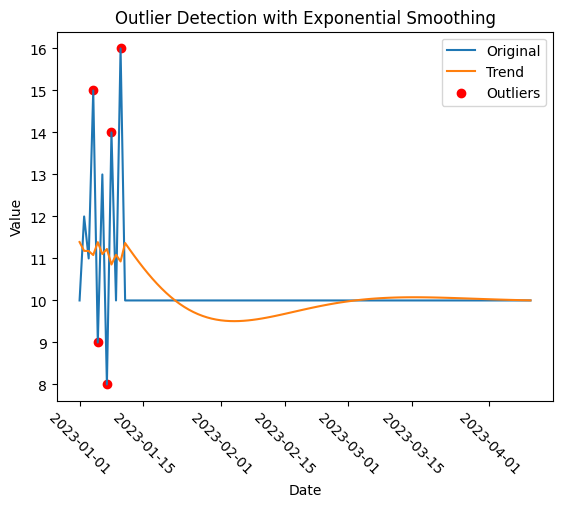

In [22]:
# 이상치 탐지
threashold = 2 # 이상치 임계값 설정
outliers = abs(deviation) > threashold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=-45)
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

- 파란색 : 원본
- 주황색 : 추세 데이터
- 빨간색 : 이상치 = 추세에서의 편차가 미리 설저안 임계값보다 큰지 여부